In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import seaborn as sns
import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
simplefilter("ignore", category=ConvergenceWarning)
%matplotlib inline

In [2]:
df = pd.read_csv('indicators.csv',parse_dates= True, index_col=0)
# df.drop(['timestamp'], axis = 1, inplace=True)

In [3]:
df.isnull().sum()

close                            0
Chaikin_oscillator               0
CCI                              0
williams_percentage              0
PSAR                             0
MFI                              0
Keltner_channels                 0
TRIX                             0
Ultimate_oscillator              0
ad_indicator                     0
Donchian_channel                 0
SMA                              0
EMA                              0
RSI                              0
ichimoku_cloud                   0
MACD                             0
Stochastic_oscillator            0
Volume_Weighted_Average_Price    0
Bollinger_band                   0
Fibonacci_retracement            0
ADX                              0
return                           0
target                           0
dtype: int64

In [4]:
X = df.drop(['close','return','target'], axis=1)
X = X.astype(int)
X.shape

(1796, 20)

In [5]:
y = df.target
y.value_counts()

 1    629
 0    589
-1    578
Name: target, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=None, shuffle= False)

In [7]:
X_train.head()

,Chaikin_oscillator,CCI,williams_percentage,PSAR,MFI,Keltner_channels,TRIX,Ultimate_oscillator,ad_indicator,Donchian_channel,SMA,EMA,RSI,ichimoku_cloud,MACD,Stochastic_oscillator,Volume_Weighted_Average_Price,Bollinger_band,Fibonacci_retracement,ADX
timestamp,,,,,,,,,,,,,,,,,,,,
2018-01-16 00:00:00+00:00,-1,0,1,-1,-1,1,0,0,-1,0,0,1,0,0,-1,1,-1,0,1,-1
2018-01-17 00:00:00+00:00,1,0,0,-1,-1,1,0,0,-1,0,0,1,0,0,-1,0,-1,0,1,-1
2018-01-18 00:00:00+00:00,-1,0,0,-1,1,0,0,0,-1,0,0,-1,0,0,-1,0,-1,0,1,-1
2018-01-19 00:00:00+00:00,1,0,0,-1,-1,0,0,0,1,0,0,-1,1,0,-1,0,-1,0,1,-1
2018-01-20 00:00:00+00:00,1,0,0,-1,-1,0,0,0,1,0,0,-1,1,0,-1,0,-1,0,1,-1


In [8]:
X_train.tail()

,Chaikin_oscillator,CCI,williams_percentage,PSAR,MFI,Keltner_channels,TRIX,Ultimate_oscillator,ad_indicator,Donchian_channel,SMA,EMA,RSI,ichimoku_cloud,MACD,Stochastic_oscillator,Volume_Weighted_Average_Price,Bollinger_band,Fibonacci_retracement,ADX
timestamp,,,,,,,,,,,,,,,,,,,,
2021-09-01 00:00:00+00:00,1,0,0,1,1,0,-1,1,-1,0,1,1,0,1,-1,0,1,0,-1,-1
2021-09-02 00:00:00+00:00,1,1,0,1,1,0,-1,1,-1,0,1,1,0,1,-1,0,1,0,-1,1
2021-09-03 00:00:00+00:00,1,1,0,1,1,0,-1,1,-1,0,1,1,0,1,-1,0,1,0,-1,1
2021-09-04 00:00:00+00:00,1,1,0,1,-1,0,-1,1,1,0,1,1,0,1,-1,0,1,0,-1,1
2021-09-05 00:00:00+00:00,1,1,-1,1,1,-1,-1,1,1,0,1,1,0,1,-1,-1,1,0,-1,1


In [9]:
X_test.head()

,Chaikin_oscillator,CCI,williams_percentage,PSAR,MFI,Keltner_channels,TRIX,Ultimate_oscillator,ad_indicator,Donchian_channel,SMA,EMA,RSI,ichimoku_cloud,MACD,Stochastic_oscillator,Volume_Weighted_Average_Price,Bollinger_band,Fibonacci_retracement,ADX
timestamp,,,,,,,,,,,,,,,,,,,,
2021-09-06 00:00:00+00:00,1,1,-1,1,1,-1,1,1,1,0,1,1,0,1,1,-1,1,-1,-1,1
2021-09-07 00:00:00+00:00,-1,0,0,-1,-1,0,-1,1,1,1,1,1,0,0,-1,0,1,0,-1,-1
2021-09-08 00:00:00+00:00,-1,-1,0,-1,-1,0,-1,1,1,0,1,1,0,0,-1,0,1,0,-1,-1
2021-09-09 00:00:00+00:00,-1,-1,0,-1,1,0,-1,1,1,0,1,1,0,0,-1,0,1,0,-1,-1
2021-09-10 00:00:00+00:00,-1,-1,1,-1,-1,0,-1,1,1,0,1,1,0,0,-1,1,1,0,-1,-1


In [10]:
X_test.tail()

,Chaikin_oscillator,CCI,williams_percentage,PSAR,MFI,Keltner_channels,TRIX,Ultimate_oscillator,ad_indicator,Donchian_channel,SMA,EMA,RSI,ichimoku_cloud,MACD,Stochastic_oscillator,Volume_Weighted_Average_Price,Bollinger_band,Fibonacci_retracement,ADX
timestamp,,,,,,,,,,,,,,,,,,,,
2023-03-31 00:00:00+00:00,1,0,0,1,-1,0,-1,1,1,0,1,1,0,0,1,0,-1,0,1,1
2023-04-01 00:00:00+00:00,-1,0,0,1,-1,0,-1,1,1,0,1,1,0,0,-1,0,-1,0,1,1
2023-04-02 00:00:00+00:00,-1,0,0,1,-1,0,-1,1,1,0,1,1,0,0,-1,0,-1,0,1,1
2023-04-03 00:00:00+00:00,-1,0,0,1,-1,0,-1,1,1,0,1,1,0,0,-1,0,-1,0,1,1
2023-04-04 00:00:00+00:00,1,0,0,1,-1,0,-1,1,1,0,1,1,0,0,-1,0,-1,0,1,1


In [11]:
model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scale', 'auto'],
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [3, 5, 7, 9],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
               'C': [0.1, 1, 10],
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter': [100, 500, 1000],
          
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {
             'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': [None, 'sqrt', 'log2'],
            'criterion': ['gini','entropy'],
            
        }
    },
    'gradient_boost':{
        'model': GradientBoostingClassifier(),
        'params':{
        "learning_rate": [0.001, 0.01, 0.1, 1],
        "n_estimators": [50, 100, 200, 300, 400, 500],
        "max_depth": [2, 3, 4, 5],
        }
    },     
    'adaboost':{
        'model': AdaBoostClassifier(),
        'params':{
        "learning_rate": [0.001, 0.01, 0.1, 1],
        'n_estimators': [50, 100, 200, 300, 400, 500],
        'algorithm': ['SAMME', 'SAMME.R']
        }
    }    
}


In [12]:
X_train.shape[0]

1257

In [13]:
window = 365
n_splits = (X_train.shape[0] - window) // window
tscv = TimeSeriesSplit(n_splits=n_splits)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [14]:
scores = []
best_estimators = {}
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=tscv, return_train_score=False,n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values(by='best_score', ascending=False)

/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio par

,model,best_score,best_params
2,logistic_regression,0.645585,"{'C': 10, 'max_iter': 500, 'penalty': 'l1', 's..."
1,random_forest,0.639618,"{'max_depth': 9, 'max_features': 'log2', 'min_..."
4,decision_tree,0.636038,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
0,svm,0.632458,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
5,gradient_boost,0.626492,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est..."
6,adaboost,0.608592,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '..."
3,naive_bayes_gaussian,0.528640,{'var_smoothing': 1e-05}


In [15]:
results = pd.DataFrame()
features = {}
results_list = []
for k, v in best_estimators.items():
    model = best_estimators[k]
    model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_list.append({'Model': k, 'Accuracy': accuracy, 
                          'Precision': precision, 
                          'Recall': recall,
                          'F1': f1
                         })

results = pd.concat([pd.DataFrame(res, index=[0]) for res in results_list], ignore_index=True)
results.sort_values(by='Accuracy', ascending=False, inplace=True)
results

,Model,Accuracy,Precision,Recall,F1
2,logistic_regression,0.643785,0.636402,0.643785,0.637665
0,svm,0.627087,0.621203,0.627087,0.623165
5,gradient_boost,0.617811,0.612759,0.617811,0.614279
6,adaboost,0.612245,0.638095,0.612245,0.616681
3,naive_bayes_gaussian,0.591837,0.597785,0.591837,0.593403
4,decision_tree,0.586271,0.591591,0.586271,0.587699
1,random_forest,0.578850,0.568442,0.578850,0.567643


In [16]:
feature_importance = pd.DataFrame()
model_names = ['adaboost','decision_tree', 'gradient_boost', 'random_forest',]

for model in model_names:
    importance = best_estimators[model].feature_importances_
    sorted_indices = np.argsort(importance)[::-1]
    sorted_features = X_train.columns[sorted_indices]
    importance_df = pd.DataFrame({'Feature': sorted_features, model: importance[sorted_indices]})
    importance_df = importance_df.set_index('Feature').T
    feature_importance = pd.concat([feature_importance, importance_df])


In [17]:
# feature_names = X_train.columns
# importances = np.abs(best_estimators['logistic_regression'].coef_)[0]
# lr = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# lr = lr.set_index('Feature').T
# feature_importance = pd.concat([feature_importance, lr])

In [18]:
feature_importance

Feature,Stochastic_oscillator,williams_percentage,CCI,Keltner_channels,Chaikin_oscillator,PSAR,MFI,Bollinger_band,ad_indicator,TRIX,Ultimate_oscillator,ADX,Fibonacci_retracement,SMA,EMA,RSI,ichimoku_cloud,MACD,Volume_Weighted_Average_Price,Donchian_channel
adaboost,0.235277,0.195053,0.163961,0.146425,0.120325,0.078720,0.053138,0.007102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
decision_tree,0.017895,0.079704,0.009647,0.415215,0.166277,0.221390,0.021417,0.026464,0.000000,0.001090,0.000000,0.002204,0.000303,0.010569,0.006074,0.002087,0.015600,0.000000,0.004063,0.000000
gradient_boost,0.092430,0.108739,0.116733,0.259373,0.131442,0.165247,0.065768,0.012396,0.011287,0.000000,0.001054,0.011244,0.008685,0.001298,0.003854,0.000000,0.004238,0.000000,0.000000,0.006212
random_forest,0.140158,0.086795,0.115487,0.154148,0.080087,0.030431,0.064392,0.025774,0.049421,0.016982,0.001577,0.096505,0.009052,0.018456,0.022510,0.008412,0.020987,0.015106,0.024086,0.019636


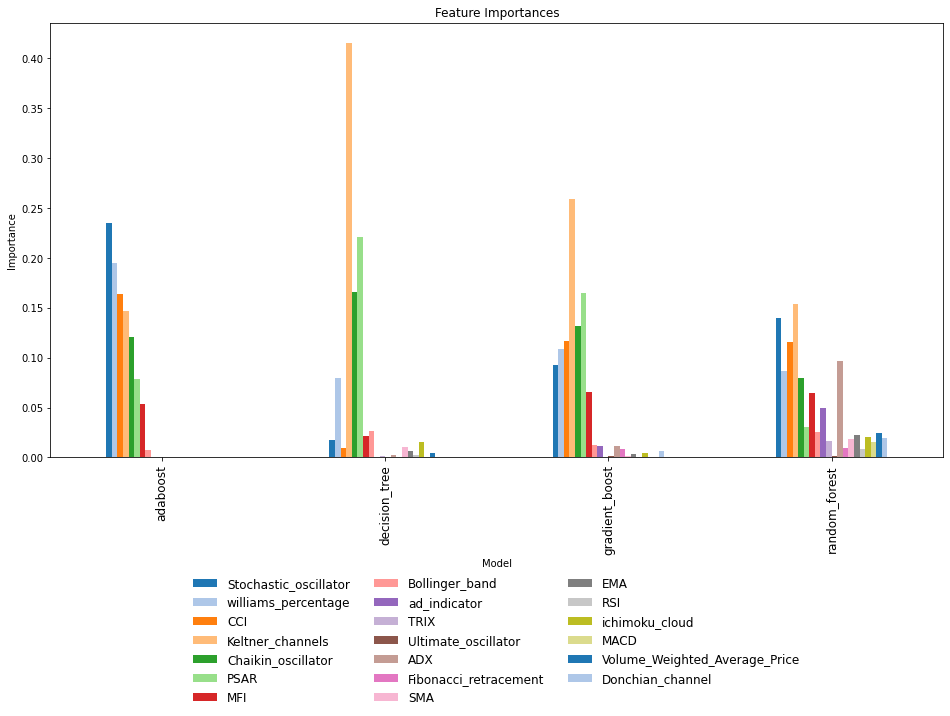

In [19]:
cmap = cm.get_cmap('tab20')
num_legends = 18
colors = [cmap(i) for i in range(num_legends)]

fig, ax = plt.subplots(figsize=(16,8))
feature_importance.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Feature Importances')
ax.set_xlabel('Model')
ax.set_ylabel('Importance')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3, fontsize = 12, frameon=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

In [20]:
y_pred

array([ 1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1, -1,  0,  0, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0, -1, -1, -1,  0, -1,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,  1,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0, -1,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,
        0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0,  0,  1,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0, -1,
       -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,
       -1,  0, -1, -1, -1

In [21]:
df = pd.read_csv('indicators.csv',parse_dates= True, index_col=0)
X = df[feature_importance.columns.tolist()[:5]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=None, shuffle= False)

In [22]:
window = 365
n_splits = (X_train.shape[0] - window) // window
tscv = TimeSeriesSplit(n_splits=n_splits)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [23]:
scores = []
best_estimators = {}
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=tscv, return_train_score=False,n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values(by='best_score', ascending=False)

/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nafis/anaconda3/envs/factoranalysis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio par

,model,best_score,best_params
2,logistic_regression,0.638425,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', '..."
4,decision_tree,0.619332,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
5,gradient_boost,0.616945,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es..."
1,random_forest,0.600239,"{'max_depth': 9, 'max_features': 'log2', 'min_..."
6,adaboost,0.597852,"{'algorithm': 'SAMME.R', 'learning_rate': 0.1,..."
0,svm,0.589499,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}"
3,naive_bayes_gaussian,0.588305,{'var_smoothing': 1e-09}


In [24]:
results = pd.DataFrame()
features = {}
results_list = []
for k, v in best_estimators.items():
    model = best_estimators[k]
    model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_list.append({'Model': k, 'Accuracy': accuracy, 
                          'Precision': precision, 
                          'Recall': recall,
                          'F1': f1
                         })

results = pd.concat([pd.DataFrame(res, index=[0]) for res in results_list], ignore_index=True)
results.sort_values(by='Accuracy', ascending=False, inplace=True)
results

,Model,Accuracy,Precision,Recall,F1
1,random_forest,0.610390,0.633724,0.610390,0.545751
4,decision_tree,0.610390,0.633724,0.610390,0.545751
6,adaboost,0.606679,0.653127,0.606679,0.610999
0,svm,0.601113,0.620614,0.601113,0.529442
2,logistic_regression,0.588126,0.584946,0.588126,0.502172
5,gradient_boost,0.575139,0.377468,0.575139,0.454066
3,naive_bayes_gaussian,0.567718,0.618288,0.567718,0.574102


In [25]:
feature_importance = pd.DataFrame()
model_names = ['random_forest', 'gradient_boost', 'adaboost','decision_tree']

for model in model_names:
    importance = best_estimators[model].feature_importances_
    sorted_indices = np.argsort(importance)[::-1]
    sorted_features = X_train.columns[sorted_indices]
    importance_df = pd.DataFrame({'Feature': sorted_features, model: importance[sorted_indices]})
    importance_df = importance_df.set_index('Feature').T
    feature_importance = pd.concat([feature_importance, importance_df])


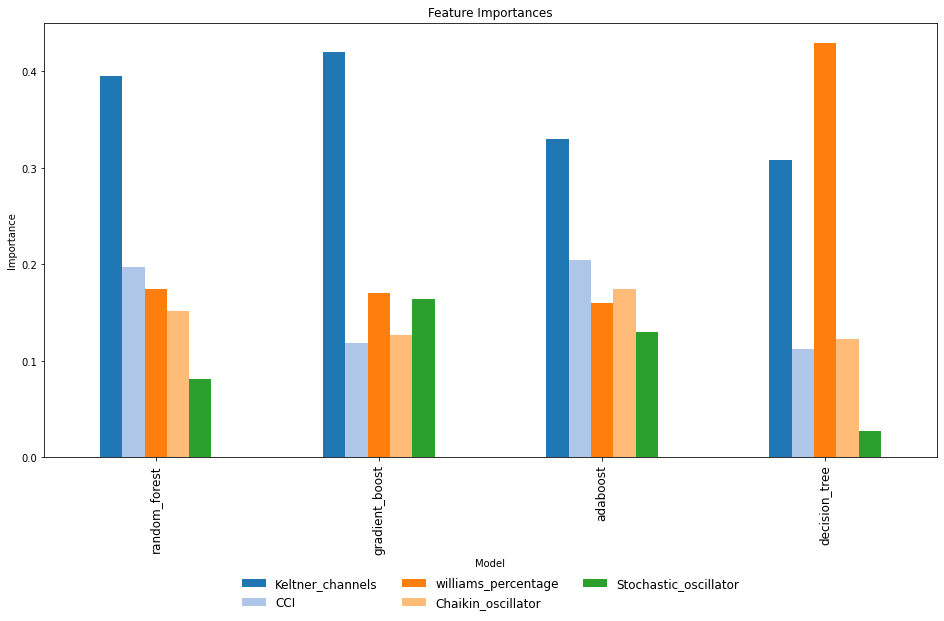

In [26]:
cmap = cm.get_cmap('tab20')
num_legends = 18
colors = [cmap(i) for i in range(num_legends)]

fig, ax = plt.subplots(figsize=(16,8))
feature_importance.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Feature Importances')
ax.set_xlabel('Model')
ax.set_ylabel('Importance')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3, fontsize = 12, frameon=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

In [27]:
res = pd.DataFrame()
X_test.reset_index(inplace = True)
res['dates'] = X_test['timestamp']
res['signal'] = y_pred

In [28]:
#res.to_csv('../../Data/predicted_signal.csv')